<a href="https://colab.research.google.com/github/2007Sachin/portfolio-projects/blob/main/OHLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
df1 = pd.read_csv('/content/HDFCBANK.NS.csv')
df2 = pd.read_csv('/content/INFY.NS.csv')
df3 = pd.read_csv('/content/SUNPHARMA.NS.csv')
df4 = pd.read_csv('/content/TATAMOTORS.NS.csv')
df5 = pd.read_csv('/content/TCS.csv')

In [4]:
merged_data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


In [5]:
# Set the 'Date' column as the index of the DataFrame
merged_data.set_index('Date', inplace=True)

In [7]:
import pandas as pd

# Assuming you have merged OHLC data for the 5 companies into separate DataFrames named df1, df2, df3, df4, df5

# Set the 'Date' column as the index of the DataFrames
df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)
df3.set_index('Date', inplace=True)
df4.set_index('Date', inplace=True)
df5.set_index('Date', inplace=True)

# Create separate DataFrames for Open, High, Low, Close prices
open_prices = pd.concat([df1['Open'], df2['Open'], df3['Open'], df4['Open'], df5['Open']], axis=1)
high_prices = pd.concat([df1['High'], df2['High'], df3['High'], df4['High'], df5['High']], axis=1)
low_prices = pd.concat([df1['Low'], df2['Low'], df3['Low'], df4['Low'], df5['Low']], axis=1)
close_prices = pd.concat([df1['Close'], df2['Close'], df3['Close'], df4['Close'], df5['Close']], axis=1)

# Concatenate the OHLC DataFrames
final_data = pd.concat([open_prices, high_prices, low_prices, close_prices], axis=1)

# Rename the columns for clarity
final_data.columns = ['df1_Open', 'df2_Open', 'df3_Open', 'df4_Open', 'df5_Open',
                      'df1_High', 'df2_High', 'df3_High', 'df4_High', 'df5_High',
                      'df1_Low', 'df2_Low', 'df3_Low', 'df4_Low', 'df5_Low',
                      'df1_Close', 'df2_Close', 'df3_Close', 'df4_Close', 'df5_Close']


In [9]:
# Assuming you have the final_data DataFrame containing the OHLC data for the 5 stocks

# Calculate weekly returns for each stock
weekly_returns = final_data.filter(like='Close').pct_change()

# Create a new DataFrame for the weekly returns
weekly_returns_df = pd.DataFrame(data=weekly_returns.values, columns=weekly_returns.columns, index=weekly_returns.index)

# Add the weekly returns as a new column in the final_data DataFrame
final_data = pd.concat([final_data, weekly_returns_df], axis=1)

# Rename the columns of the weekly returns
weekly_returns_columns = ['Weekly Returns_' + col.split('_')[0] for col in weekly_returns.columns]
final_data.columns = final_data.columns[:-len(weekly_returns_columns)].tolist() + weekly_returns_columns

# Print the updated DataFrame with weekly returns
print(final_data)


               df1_Open     df2_Open     df3_Open    df4_Open  df5_Open  \
Date                                                                      
2022-06-27  1344.000000  1469.000000   828.000000         NaN      7.39   
2022-07-04  1353.699951  1480.250000   825.299988  411.549988      6.39   
2022-07-11  1394.000000  1495.000000   856.799988  438.049988      6.80   
2022-07-18  1348.000000  1450.000000   888.599976  443.950012      6.74   
2022-07-25  1395.000000  1480.099976   870.000000  456.000000      7.36   
...                 ...          ...          ...         ...       ...   
2023-06-16          NaN          NaN   990.000000  569.650024       NaN   
2023-06-20          NaN          NaN  1007.650024  566.049988       NaN   
2023-06-21          NaN          NaN   991.950012  584.950012       NaN   
2023-06-22          NaN          NaN   987.099976  584.000000       NaN   
2023-06-23          NaN          NaN   994.000000  570.000000       NaN   

               df1_High 

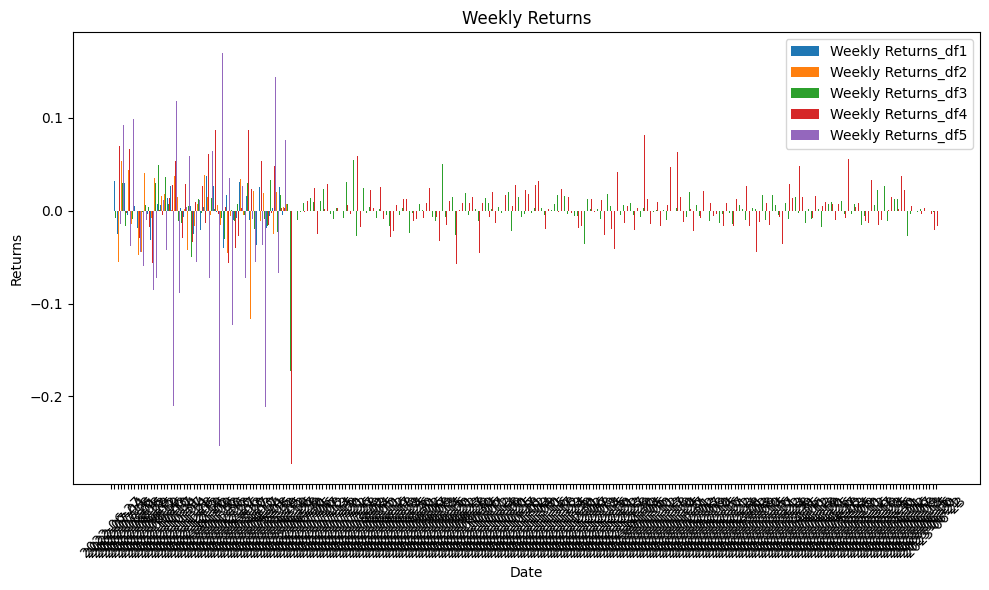

In [20]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the final_data DataFrame with the 'Weekly Returns' column

# Plotting the weekly returns as a bar chart
plt.figure(figsize=(10, 6))

# Get the dates and the corresponding weekly returns for each stock
dates = final_data.index
weekly_returns = final_data.iloc[:, -5:]  # Assuming the last 5 columns represent the weekly returns

# Define the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
positions = np.arange(len(dates))

# Loop through each stock symbol and plot the corresponding weekly returns as a bar
for i, symbol in enumerate(weekly_returns.columns):
    plt.bar(positions + (i * bar_width), weekly_returns[symbol], width=bar_width, label=symbol)

plt.title('Weekly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(positions, dates, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



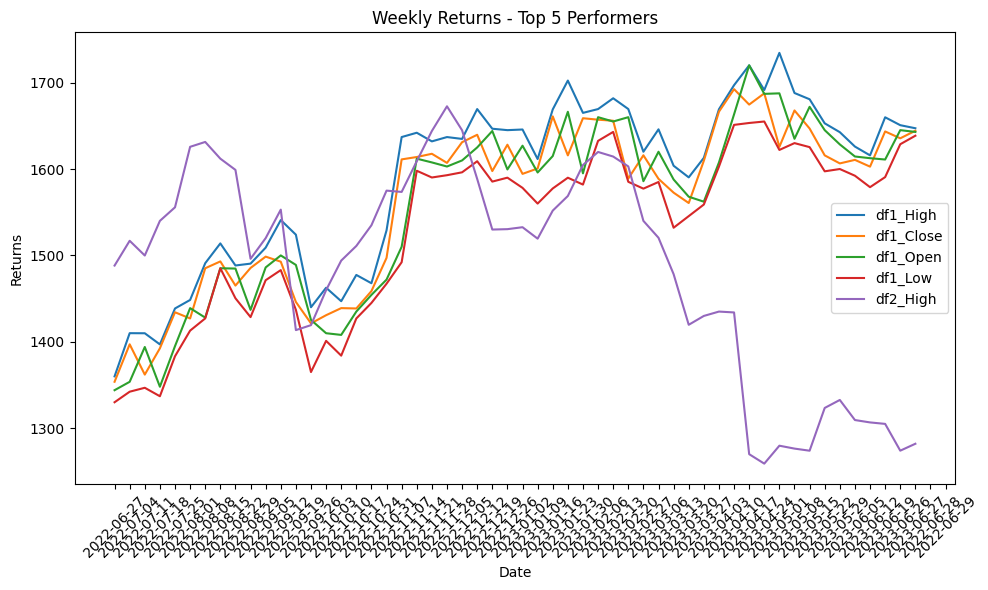

In [23]:
import matplotlib.pyplot as plt

# Assuming you have the final_data DataFrame with the 'Weekly Returns' column

# Calculate the average weekly returns for each stock
average_returns = final_data.mean()

# Sort the stocks based on their average weekly returns in descending order
sorted_returns = average_returns.sort_values(ascending=False)

# Select the top 5 performers based on highest weekly returns
top5_performers = sorted_returns[:5]

# Get the dates and the corresponding weekly returns for the top 5 performers
dates = final_data.index
weekly_returns = final_data[top5_performers.index]

# Plotting the weekly returns for the top 5 performers as a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each stock symbol and plot the corresponding weekly returns as a line
for symbol in weekly_returns.columns:
    ax.plot(dates, weekly_returns[symbol], label=symbol)

plt.title('Weekly Returns - Top 5 Performers')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have the final_data DataFrame with the 'Weekly Returns' column

# Calculate the average weekly returns for each stock
average_returns = final_data.mean()

# Sort the stocks based on their average weekly returns in descending order
sorted_returns = average_returns.sort_values(ascending=False)

# Select the top 5 performers based on highest weekly returns
top5_performers = sorted_returns[:5]

# Get the dates and the corresponding weekly returns for the top 5 performers
dates = final_data.index
weekly_returns = final_data[top5_performers.index]

# Set the number of periods to forecast
forecast_periods = 10

# Initialize an empty DataFrame to store the forecasted values
forecast_data = pd.DataFrame(index=pd.date_range(start=dates[-1], periods=forecast_periods+1, freq='W-FRI'))

# Loop through each stock symbol and forecast future weekly returns
for symbol in weekly_returns.columns:
    # Fit the ARIMA model to the historical weekly returns
    model = ARIMA(weekly_returns[symbol], order=(1, 1, 1))  # Modify the order if needed
    model_fit = model.fit()

    # Forecast future values of weekly returns
    forecast = model_fit.forecast(steps=forecast_periods)[0]

    # Create an index for the forecasted values
    forecast_index = pd.date_range(start=dates[-1] + pd.DateOffset(weeks=1), periods=forecast_periods, freq='W-FRI')

    # Add the forecasted values to the DataFrame
    forecast_data[symbol] = forecast
    forecast_data.index = forecast_index

# Combine the historical weekly returns and the forecasted values
combined_data = pd.concat([weekly_returns, forecast_data])

# Plotting the historical and forecasted weekly returns as a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each stock symbol and plot the historical and forecasted weekly returns as lines
for symbol in combined_data.columns:
    ax.plot(combined_data.index, combined_data[symbol], label=symbol)

plt.title('Historical and Forecasted Weekly Returns - Top 5 Performers')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

KeyError: ignored